In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./scores.csv")
df.head()


,id,year,week,team,pts_for,opponent,pts_against
0,20190101,2019,1,Lude,80.56,Ost,105.20
1,20190102,2019,1,Ost,105.20,Lude,80.56
2,20190111,2019,1,Benny,104.56,Rades,75.54
3,20190112,2019,1,Rades,75.54,Benny,104.56
4,20190121,2019,1,Strand,80.60,Schingen,59.92


In [137]:
df.loc[df['pts_for'] > df['pts_against'], 'wins'] = 1
df.loc[df['pts_for'] < df['pts_against'], 'wins'] = 0

df.describe()

,id,year,week,pts_for,pts_against,wins
count,2.340000e+03,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000
mean,2.012073e+07,2012.000000,7.000000,91.006761,91.006761,0.500000
std,4.321580e+04,4.321417,3.742457,20.526566,20.526566,0.500107
min,2.005010e+07,2005.000000,1.000000,26.680000,26.680000,0.000000
25%,2.008104e+07,2008.000000,4.000000,76.155000,76.155000,0.000000
50%,2.012073e+07,2012.000000,7.000000,89.630000,89.630000,0.500000
75%,2.016041e+07,2016.000000,10.000000,104.510000,104.510000,1.000000
max,2.019135e+07,2019.000000,13.000000,170.280000,170.280000,1.000000


Text(0, 0.5, '# of Times')

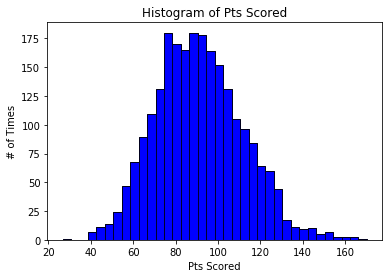

In [138]:
# matplotlib histogram
plt.hist(df['pts_for'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(df['pts_for'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Pts Scored')
plt.xlabel('Pts Scored')
plt.ylabel('# of Times')

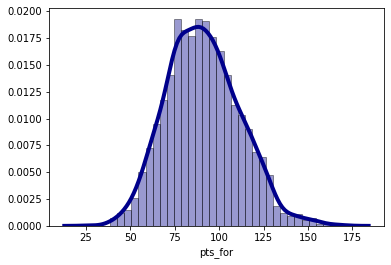

In [139]:
# Density Plot and Histogram of weekly pts scored
sns.distplot(df['pts_for'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [140]:
list(set(df['team']))

['Sarge',
 'Ost',
 'Gresh',
 'Benny',
 'Rades',
 'Schingen',
 'Faber',
 'Frank',
 'Ceej',
 'Lude',
 'Strand',
 'Winks']

Text(0, 0.5, 'Density')

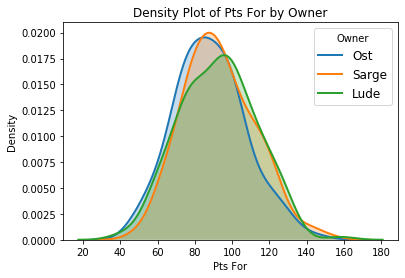

In [141]:
# List of owners
# owners = list(set(df['team']))
owners = ['Ost', 'Sarge', 'Lude']

# Iterate through the five airlines
for owner in owners:
    # Subset to the airline
    subset = df[df['team'] == owner]
    
    # Draw the density plot
    sns.distplot(subset['pts_for'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = owner)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Owner', loc = 'upper right')
plt.title('Density Plot of Pts For by Owner')
plt.xlabel('Pts For')
plt.ylabel('Density')

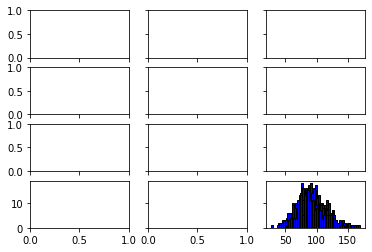

In [142]:
fig, ax = plt.subplots(4, 3, sharex='col', sharey='row')
    
# Subset to the airline
owners = list(set(df['team']))
# owners = ['Ost', 'Sarge', 'Lude']

# Iterate through the five airlines
for i in range(0,4):
    for j in range(0,3):
        
        subset = df[df['team'] == owners[i*3+j]]
        
#         print('i=' + str(i) + " , j=" + str(j))
              
#         Draw the density plot
        ax[0, 0] = plt.hist(subset['pts_for'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))



In [143]:
df.groupby('year').agg('mean')['pts_for']

year
2005    89.827949
2006    89.469231
2007    91.133462
2008    86.657308
2009    91.522821
2010    91.237179
2011    91.683974
2012    93.473846
2013    94.132436
2014    92.756026
2015    92.326282
2016    92.472821
2017    86.204103
2018    98.225897
2019    83.978077
Name: pts_for, dtype: float64

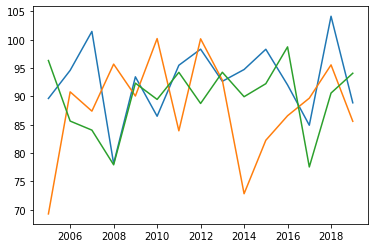

In [144]:
plt.plot(df[df['team']=='Sarge'].groupby('year').agg('mean')['pts_for'])
plt.plot(df[df['team']=='Ost'].groupby('year').agg('mean')['pts_for'])
plt.plot(df[df['team']=='Faber'].groupby('year').agg('mean')['pts_for'])

Text(0, 0.5, 'Density')

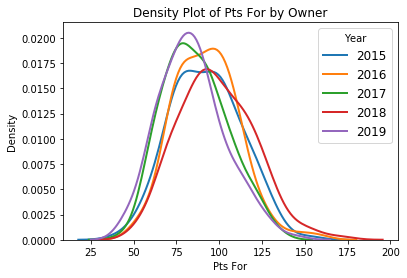

In [145]:
# List of owners
years = list(set(df['year']))
# owners = ['Ost', 'Sarge', 'Lude']

# Iterate through the five airlines
for year in range(2015,2020):
    # Subset to the airline
    subset = df[df['year'] == year]
    
    # Draw the density plot
    sns.distplot(subset['pts_for'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2},
                 label = year)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Year', loc = 'upper right')
plt.title('Density Plot of Pts For by Owner')
plt.xlabel('Pts For')
plt.ylabel('Density')

In [146]:
df.head()

,id,year,week,team,pts_for,opponent,pts_against,wins
0,20190101,2019,1,Lude,80.56,Ost,105.20,0.0
1,20190102,2019,1,Ost,105.20,Lude,80.56,1.0
2,20190111,2019,1,Benny,104.56,Rades,75.54,1.0
3,20190112,2019,1,Rades,75.54,Benny,104.56,0.0
4,20190121,2019,1,Strand,80.60,Schingen,59.92,1.0


In [147]:
df = df.sort_values(['team','year','week'])
# df['cumsum'] = df['wins'].cumsum()
df['cumsum'] = df.groupby(['team','year'])['wins'].cumsum()

df.head()

,id,year,week,team,pts_for,opponent,pts_against,wins,cumsum
161,20050122,2005,1,Benny,98.76,Ost,71.34,1.0,1.0
175,20050232,2005,2,Benny,81.68,Frank,83.84,0.0,1.0
187,20050332,2005,3,Benny,75.42,Sarge,95.66,0.0,1.0
201,20050442,2005,4,Benny,97.56,Schingen,102.88,0.0,1.0
213,20050542,2005,5,Benny,63.20,Faber,93.04,0.0,1.0


In [148]:
df.to_csv('all_time_scores.csv')